...
Pandas는 Panel Datas의 줄임말로써 파이썬을 이영한 데이터 분석에서 가장 많이 사용되는
라이브러리
Numpy를 기반으로 만들어졌으며 데이터 분석을 위한 효율적인 데이터구조(메트릭스 구조)를 제공한다.

Pandas의 자료구조
1. Series - 1차원 배열형태 자료구조(벡터)
            Series(ndarray, index)
            index : optional, 지정을 안할 경우 정수타입의 리스트 삽입

2. DataFrame - 2차원 배열형태 자료구조(메트릭스)
               행을 구분하는 인덱스와 열을 구분하는 컬럼이 있다..
               별도의 지정이 없으면 인덱스는 정수로 설정
               한번 지정된 인덱스는 변경되지 않는다.

3. Panel - (3차원)
...

### Series
시리즈 생성, 구조 확인

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#### 1. 시리즈를 생성하고 구조확인

In [4]:
ser1 = Series?

In [9]:
# 처음에는 index 속성없이 생성해보겠다. data는 배열형태
# np배열 만드는 방법 1)array() 2)random
# index를 명식적으로 지정하지 않으면 자동적으로 0 ~ N-1 까지의 정수로 지정된다.
np.random.seed(100)
# ser1 = Series(np.random.randint(10,20,5), index=['a', 'b', 'c', 'd', 'e'])
ser1 = Series(np.random.randint(10,20,5), index=list('abcde'))
print(ser1)
print(ser1.index)
print(ser1.values)
print(ser1.dtype)

a    18
b    18
c    13
d    17
e    17
dtype: int32
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[18 18 13 17 17]
int32


#### 2. 시리즈 값 조회하기
        인덱싱 | 슬라이싱
단일값을 선택하거나 여러값을 선택할때 인덱스로 숫자나 라벨을 사용할 수 있다.
#### 이때, 슬라이싱되는 방법이 달라진다.

#### 1) 라벨사용 - 마지막 라벨 포함

#### 2) 숫자 사용 - 마지막 숫자 포함 안함

In [17]:
print(ser1['c']) # 인덱싱(라벨사용)
print(ser1[2]) # 인덱싱(숫자사용)
print(ser1[1:4])
print(ser1['b':'d'])

13
13
b    18
c    13
d    17
dtype: int32
b    18
c    13
d    17
dtype: int32


In [21]:
# 응용해서 조회하기
ser1_1 = ser1[::2]
ser1_1

ser1_2 = ser1[:2]
ser1_2

a    18
b    18
dtype: int32

#### 3. 시리즈 간의 연산과 누락데이터 처리하기

In [26]:
print(ser1_1)
print(ser1)

# 시리즈간의 연산
result = ser1+ser1_1
print(result) #b,d에 해당하는 값들은 NaN으로 채워짐 (NaN : 누락데이타, 결측값, dtype은 float64)



a    18
c    13
e    17
dtype: int32
a    18
b    18
c    13
d    17
e    17
dtype: int32
a    36.0
b     NaN
c    26.0
d     NaN
e    34.0
dtype: float64


#### 4. 누락데이타 조회 - isnull(), notnull()

In [28]:
result

a    36.0
b     NaN
c    26.0
d     NaN
e    34.0
dtype: float64

In [33]:
print(result.isnull())
print('*'*30)
print(result.notnull())
print('*'*30)
print(result.isnull().sum())
print('*'*30)
print(result[result.isnull()])
print('*'*30)
print(result[result.notnull()])

a    False
b     True
c    False
d     True
e    False
dtype: bool
******************************
a     True
b    False
c     True
d    False
e     True
dtype: bool
******************************
2
******************************
b   NaN
d   NaN
dtype: float64
******************************
a    36.0
c    26.0
e    34.0
dtype: float64


#### 5. Matplot을 이용한 시각화

In [34]:
import matplotlib.pyplot as plt

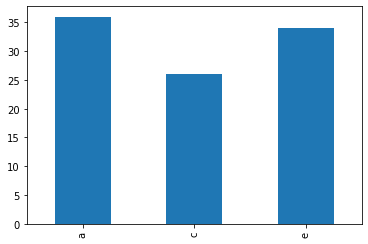

In [38]:
# 누락데이터가 아닌 값들을 시각화해 본다
result[result.notnull()].plot(kind='bar')
# result[result.isnull()].plot(kind='bar') #
plt.show()